In [1]:
import os, shutil

# 훈련, 검증, 테스트 데이터 directory 저장
train_dir = './datasets/train'
validation_dir = './datasets/validation'
test_dir = './datasets/test'

# train directory
train_pikachu_dir = './datasets/train/피카츄'
train_spongebob_dir = './datasets/train/스폰지밥'

# validation directory
validation_pikachu_dir = './datasets/validation/피카츄'
validation_spongebob_dir = './datasets/validation/스폰지밥'

# test directory
test_pikachu_dir = './datasets/test/피카츄'
test_spongebob_dir = './datasets/test/스폰지밥'
    
print('훈련용 피카츄 이미지 전체 개수:', len(os.listdir(train_pikachu_dir)))
print('훈련용 스폰지밥 이미지 전체 개수:', len(os.listdir(train_spongebob_dir)))
print('검증용 피카츄 이미지 전체 개수:', len(os.listdir(validation_pikachu_dir)))
print('검증용 스폰지밥 이미지 전체 개수:', len(os.listdir(validation_spongebob_dir)))
print('테스트용 피카츄 이미지 전체 개수:', len(os.listdir(test_pikachu_dir)))
print('테스트용 스폰지밥 이미지 전체 개수:', len(os.listdir(test_spongebob_dir)))

훈련용 피카츄 이미지 전체 개수: 20
훈련용 스폰지밥 이미지 전체 개수: 20
검증용 피카츄 이미지 전체 개수: 5
검증용 스폰지밥 이미지 전체 개수: 5
테스트용 피카츄 이미지 전체 개수: 5
테스트용 스폰지밥 이미지 전체 개수: 5


In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [4]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 reshape
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [7]:
# 학습시키기

history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/30
2/2 [==============================] - 2s 829ms/step - loss: 0.8130 - acc: 0.5000 - val_loss: 0.6675 - val_acc: 0.5000
Epoch 2/30
2/2 [==============================] - 1s 301ms/step - loss: 0.6450 - acc: 0.7750 - val_loss: 0.6823 - val_acc: 0.5000
Epoch 3/30
2/2 [==============================] - 1s 300ms/step - loss: 0.5977 - acc: 0.5500 - val_loss: 0.6449 - val_acc: 0.5000
Epoch 4/30
2/2 [==============================] - 1s 299ms/step - loss: 0.5759 - acc: 0.5750 - val_loss: 0.5435 - val_acc: 1.0000
Epoch 5/30
2/2 [==============================] - 1s 299ms/step - loss: 0.5003 - acc: 0.8750 - val_loss: 0.5938 - val_acc: 0.5000
Epoch 6/30
2/2 [==============================] - 1s 300ms/step - loss: 0.4338 - acc: 0.8000 - val_loss: 0.4088 - val_acc: 1.0000
Epoch 7/30
2/2 [==============================] - 1s 303ms/step - loss: 0.3351 - acc: 0.9750 - val_loss: 0.3849 - val_acc: 0.8000
Epoch 8/30
2/2 [==============================] - 1s 300ms/step - loss: 0.4390 - acc: 0.75

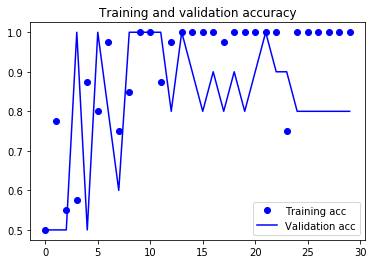

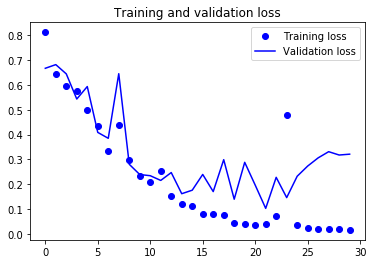

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

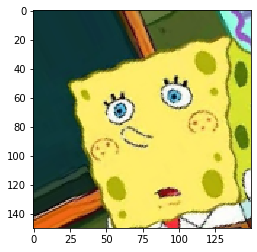

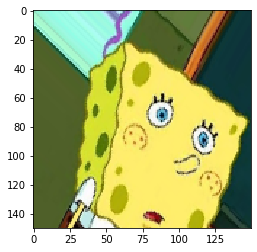

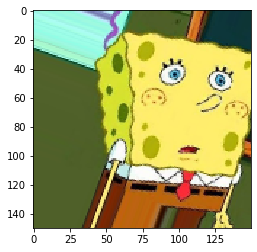

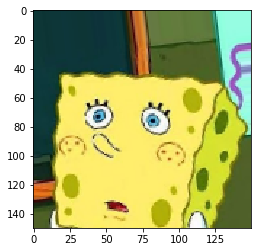

In [19]:
# Data augmentation 사용

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_spongebob_dir, fname) for fname in os.listdir(train_spongebob_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #dropout 적용
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/30
2/2 [==============================] - 1s 450ms/step - loss: 0.6958 - acc: 0.4500 - val_loss: 0.6858 - val_acc: 0.5000
Epoch 2/30
2/2 [==============================] - 1s 303ms/step - loss: 0.6799 - acc: 0.6250 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 3/30
2/2 [==============================] - 1s 303ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6752 - val_acc: 0.5000
Epoch 4/30
2/2 [==============================] - 1s 306ms/step - loss: 0.6660 - acc: 0.5000 - val_loss: 0.6360 - val_acc: 0.5000
Epoch 5/30
2/2 [==============================] - 1s 306ms/step - loss: 0.6434 - acc: 0.7000 - val_loss: 0.6233 - val_acc: 0.5000
Epoch 6/30
2/2 [==============================] - 1s 308ms/step - loss: 0.6320 - acc: 0.6250 - val_loss: 0.5819 - val_acc: 0.6000
Epoch 7/30
2/2 [==============================] - 1s 302ms/step - loss: 0.6109 - acc: 0.7250 - val_loss: 0.5837 - val_acc: 0.5000
Epoch 8/30

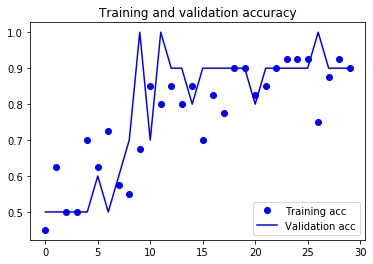

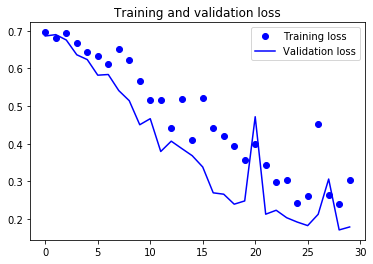

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()